# Apprentissage supervisé - Régression Multiple

Nous avons vu précédemment la régression linéaire simple, via les modèles `LinearRegression` et `HuberRegression`, toutefois si nos tests ont très bien fonctionné, il est rare que nos régressions soient simples dans le monde réel, les problèmes sont plus complexes et donc impliquent plus de variables (features).

Etant donné que nous sommes toujours dans le cas d'une régression nos données doivent toujours être **numériques quantitatives**.

![Image regression](../_images/regression.jpg)
Notre but est toujours de trouver la courbe passant par le plus de points, mais cette fois-ci avec plusieurs features (entrées).

## Régression linéaire multiple

Beaucoup plus utilisée donc, la régression linéaire multiple consiste à trouver la droite répondant à l'équation suivante :
$$ y = a1x1 + a2x2 + … + anxn + b $$
A partir de notre jeu de données qui ressemble à quelque chose comme ceci
![Image regression](../_images/dataframe-linear-multiple.jpg)
On remarque maintenant la présence de plusieurs colonnes de features

Pour les outils, on ne change pas par rapport à tout à la régression linéaire simple, on va donc utiliser :
- numpy
- pandas
- matplotlib.pyplot
- scikit-learn

(voir les précédentes pratiques si vous avez oublié ce que font ces outils)

Quant au dataset, nous allons changer de fichier, mais rester dans le même thème. Cette fois nous allons essayer de trouver la valeur d'un crédit immobilier accordé à une personne en fonction de critières définis.

# Avant-propos - Pour les utilisateurs de Google colab

Petit apparté pour les utilisateurs de google colab. Pour utiliser la méthode `pd.read_csv()`, il faudra rajouter quelques lignes de codes supplémentaires pour pouvoir charger un fichier, les voici.

```python
# Première cellule jupyter
from google.colab import files
uploaded = files.upload()
```

```python
# Seconde cellule jupyter
import io
# Très important : le nom du fichier passé en paramètre de la fonction "uploaded" doit avoir le même nom que le fichier que vous avez uploadé
df = pd.read_csv(io.BytesIO(uploaded['nom-du-fichier-uploader.csv']))
```

- [Voir plus  d'informations sur le chargement de fichiers externes avec Google colab](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

# Phase 1 : Chargement des données

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

credit_df = pd.read_csv("credit-immo.csv")
credit_df.sort_values("loan", inplace=True)
credit_df["loan"] = credit_df["loan"].astype(int)
display(credit_df)

,age,credit-rating,children,loan
940,18,23.210,0,1121
808,18,30.140,0,1131
1244,18,33.330,0,1135
663,18,33.660,0,1136
22,18,34.100,0,1137
...,...,...,...,...
819,33,35.530,0,55135
577,31,38.095,1,58571
1230,52,34.485,3,60021
1300,45,30.360,0,62592


On remarque donc que notre jeu de données est composé de quatre colonnes. Notre régression sera donc multiple, nous cherchonsà trouver la valeur de la colonne "loan" (crédit en français). Notre équation sera donc de la forme suivante :
$$ loan = a1(age) + a2(credit-rating) + a3(children) + b $$
scikit-learn va nous aider à trouver les valeurs de "a1-3" et "b". 

On remarque également que nos clés sont en anglais, nous allons donc les renommer en français dans la phase 2 : exploration des données

# Phase 2 : Exploration des données

On essaye de se poser des questions pour mieux connaître notre jeu de données :
- Est-ce qu'il y a des données manquantes ? `df.isnull().sum()`
- Est-ce que le format de données est correct ? `df.dtypes`
- Quels sont les données statistiques que nous pouvons sortir de notre dataset ? `df.describe()`


## A vous de coder

Mais avant on renomme nos colonnes grâce à pandas.
- [Documentation de la méthode `rename` de pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)

In [60]:
# Premiere étape renommage des colonnes
# - age -> age
# - credit-rating -> note-de-credit
# - children -> nombre-d-enfants
# - loan -> credit-immobilier

credit_df.rename(
    columns={"credit-rating": "note-de-credit", "children": "nombre-d-enfants", "loan": "credit-immobilier"}, 
    inplace=True
)

credit_df.describe()

# Est-ce qu'il y a des données manquantes ?

# Est-ce que le format de données est correct ?

# Quels sont les données statistiques que nous pouvons sortir de notre dataset ? 

,age,note-de-credit,nombre-d-enfants,credit-immobilier
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.669645,1.094918,13269.928999
std,14.049960,6.105650,1.205493,12110.012755
min,18.000000,15.960000,0.000000,1121.000000
25%,27.000000,26.296250,0.000000,4740.000000
50%,39.000000,30.400000,1.000000,9381.500000
75%,51.000000,34.700000,2.000000,16639.250000
max,64.000000,53.130000,5.000000,63770.000000


Vu que nous savons maintenant faire des graphiques, nous allons essayer de modéliser tout ça.

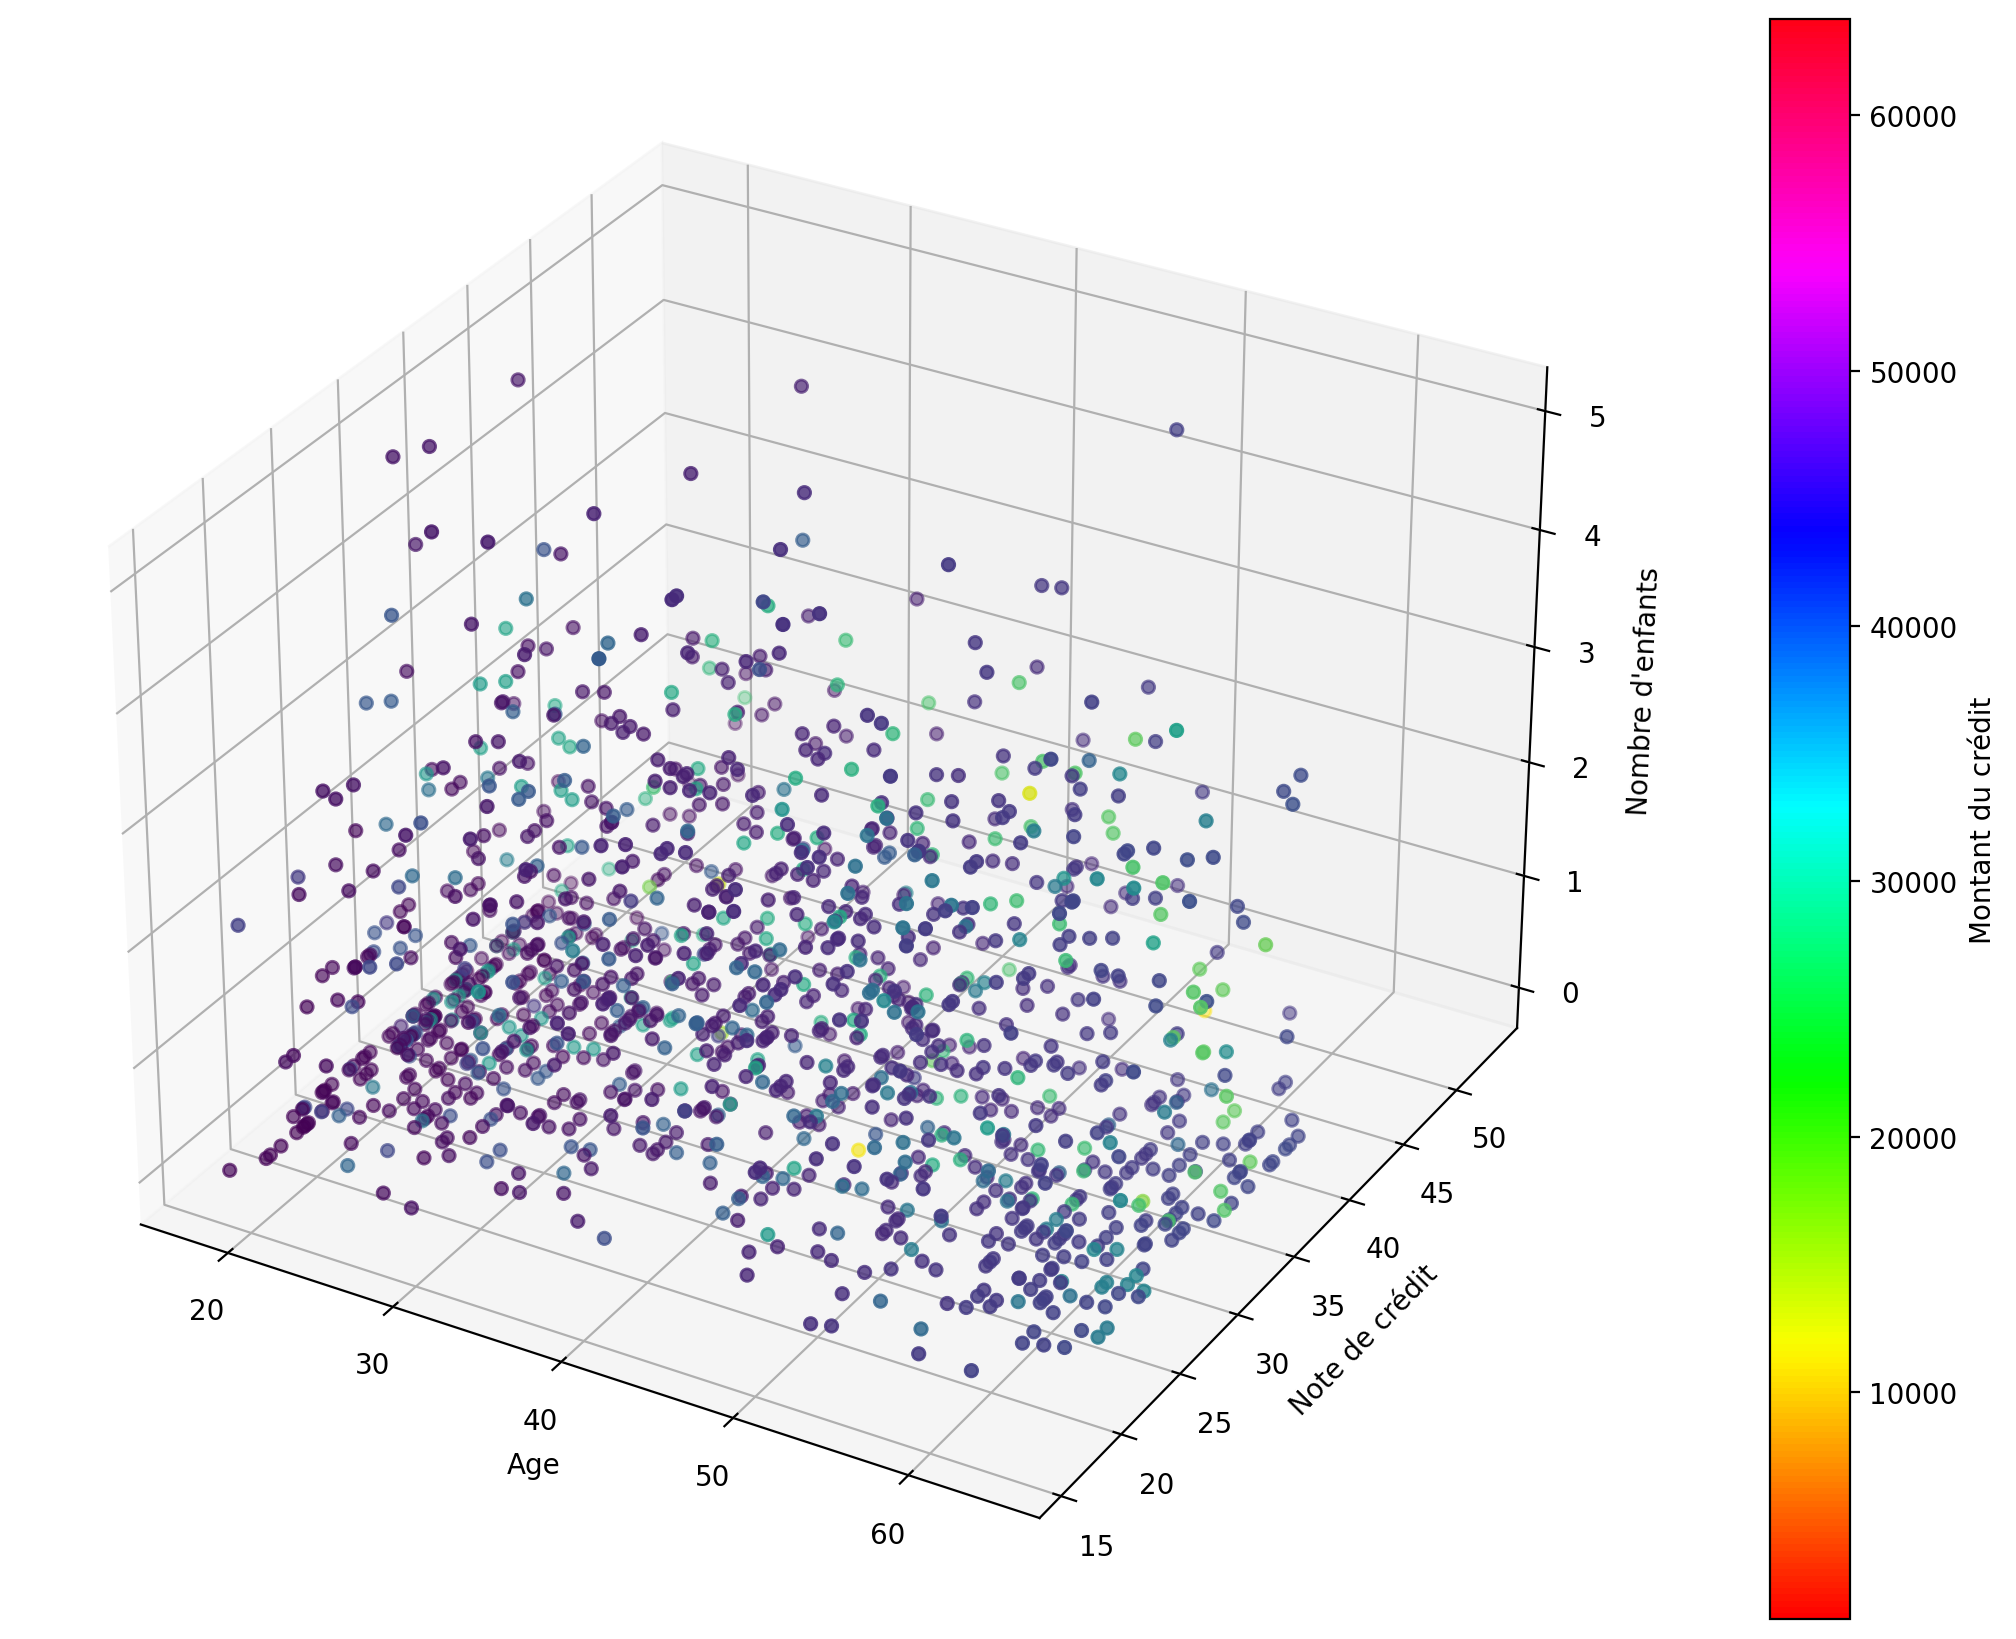

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

fig = plt.figure(figsize=(15, 8), dpi=200)
ax = Axes3D(fig)

ax.set_xlabel('Age')
ax.set_ylabel('Note de crédit')
ax.set_zlabel('Nombre d\'enfants')

colmap = cm.ScalarMappable(cmap=cm.hsv)
colmap.set_array(credit_df["credit-immobilier"])


cbar = fig.colorbar(colmap, orientation='vertical')
cbar.set_label('Montant du crédit')

ax.scatter(
    credit_df["age"], # x
    credit_df["note-de-credit"], # y  
    credit_df["nombre-d-enfants"], # z
    marker='o', 
    label="données",
    c=credit_df["credit-immobilier"]
)

# Phase 3 : Nettoyage / Formattage

On a vu que certaines colonnes avaient des formats inadaptés nous allons donc y remédier. 

# Phase 4 : Modélisation

Nous allons utiliser scikit-learn et la régression linéaire via la ligne de code suivante `from sklearn.linear_model import LinearRegression, HuberRegressor`.
Nous allons donc tester deux modèles en même temps, et nous allons également utiliser la fonction `train_test_split` pour valider notre modèle et comparer avec les prédictions.

In [63]:
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split

liste_entrees = credit_df[["age", "note-de-credit", "nombre-d-enfants"]]
sortie = credit_df['credit-immobilier']

taux_donnees_test = 0.2
X_entrainement, X_test, y_entrainement, y_test = train_test_split(
    liste_entrees, 
    sortie,
    random_state=1,
    shuffle=False,
    test_size=taux_donnees_test)

In [70]:
reg_lineaire = LinearRegression()
reg_lineaire.fit(X_entrainement, y_entrainement)

print(reg_lineaire.score(X_entrainement, y_entrainement))
reg_lineaire_pred = reg_lineaire.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted (linear)': reg_lineaire_pred})
display(df)

0.36929237606302046


,Actual,Predicted (linear)
291,20277,6125.960100
1208,20296,8106.959794
1104,20420,7290.328218
264,20462,11225.665839
45,20630,10330.234016
...,...,...
819,55135,5986.702979
577,58571,5816.530837
1230,60021,11324.973198
1300,62592,8876.896062


Que constatez-vous ?

In [66]:
reg_huber = HuberRegressor()
reg_huber.fit(X_entrainement, y_entrainement)

reg_huber_pred = reg_huber.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted (huber)': reg_huber_pred, 'Predicted (linear)': reg_lineaire_pred})
display(df)

,Actual,Predicted (huber),Predicted (linear)
291,20277,4374.981285,6125.960100
1208,20296,6529.559667,8106.959794
1104,20420,6041.639150,7290.328218
264,20462,11370.180313,11225.665839
45,20630,10635.121630,10330.234016
...,...,...,...
819,55135,4908.164780,5986.702979
577,58571,4769.239493,5816.530837
1230,60021,11163.109289,11324.973198
1300,62592,8125.443252,8876.896062


Que constatez-vous ?

Encore une fois nous avons beaucoup trop de données aberrantes, nous allons devoir nous fier à `outliers_` pour retirer les données aberrantes

In [68]:
credit_sans_ab_df = credit_df[:len(liste_valeurs_aberrantes):][liste_valeurs_aberrantes]
liste_entrees_sab = credit_sans_ab_df[["age",  "nombre-d-enfants", "note-de-credit"]] # ,
sortie_sab = credit_sans_ab_df['credit-immobilier']

X_entrainement_sab, X_test_sab, y_entrainement_sab, y_test_sab = train_test_split(
    liste_entrees_sab, 
    sortie_sab,
    random_state=1,
    shuffle=False,
    test_size=taux_donnees_test)

reg_huber_sab = HuberRegressor(
)
reg_huber_sab.fit(X_entrainement_sab, y_entrainement_sab)
print(reg_huber_sab.score(X_entrainement_sab, y_entrainement_sab))
reg_huber_sab_pred = reg_huber_sab.predict(X_test_sab)

# Enfin on retourne un dataframe pour que ça soit plus lisible
df = pd.DataFrame({'Actual': y_test_sab, 'Predicted (huber)': reg_huber_sab_pred})
display(df)

0.3831212917366307


,Actual,Predicted (huber)
1306,16115,3714.162163
975,16138,3713.930452
1252,16232,1246.539222
296,16297,972.404473
994,16420,4776.531001
...,...,...
954,20009,5619.752274
638,20149,6453.611613
1231,20167,1247.758753
306,20177,4512.237130


In [85]:
from sklearn.ensemble import RandomForestRegressor

liste_entrees_sab = credit_sans_ab_df[["nombre-d-enfants", "note-de-credit"]] # ,
sortie_sab = credit_sans_ab_df['credit-immobilier']

X_entrainement_sab, X_test_sab, y_entrainement_sab, y_test_sab = train_test_split(
    liste_entrees_sab, 
    sortie_sab,
    random_state=1,
    shuffle=False,
    test_size=taux_donnees_test)

regr = RandomForestRegressor()
regr.fit(X_entrainement_sab, y_entrainement_sab)
print(regr.score(X_entrainement_sab, y_entrainement_sab))


reg_huber_sab_pred = regr.predict(X_test_sab)

# Enfin on retourne un dataframe pour que ça soit plus lisible

df = pd.DataFrame({'Actual': y_test_sab, 'Predicted (huber)': reg_huber_sab_pred})
display(df.sort_values('Actual'))

0.800414695788852


,Actual,Predicted (huber)
1306,16115,12978.640000
975,16138,9540.790000
1252,16232,4103.250000
296,16297,4672.280000
994,16420,7813.890000
...,...,...
954,20009,5178.370000
638,20149,11939.430000
1231,20167,11724.418333
306,20177,8692.430000


Nous avons donc prédit la valeur de notre loyer en fonction de la surface. ** Ce sont des prédictions ** rien ne nous dit que ça sera la même chose en vrai, l'idée est d'avoir un ordre d'idée.

Avant de finir, on va quand même tracer notre droite et afficher notre équation, c'est ce que nous cherchons à faire.

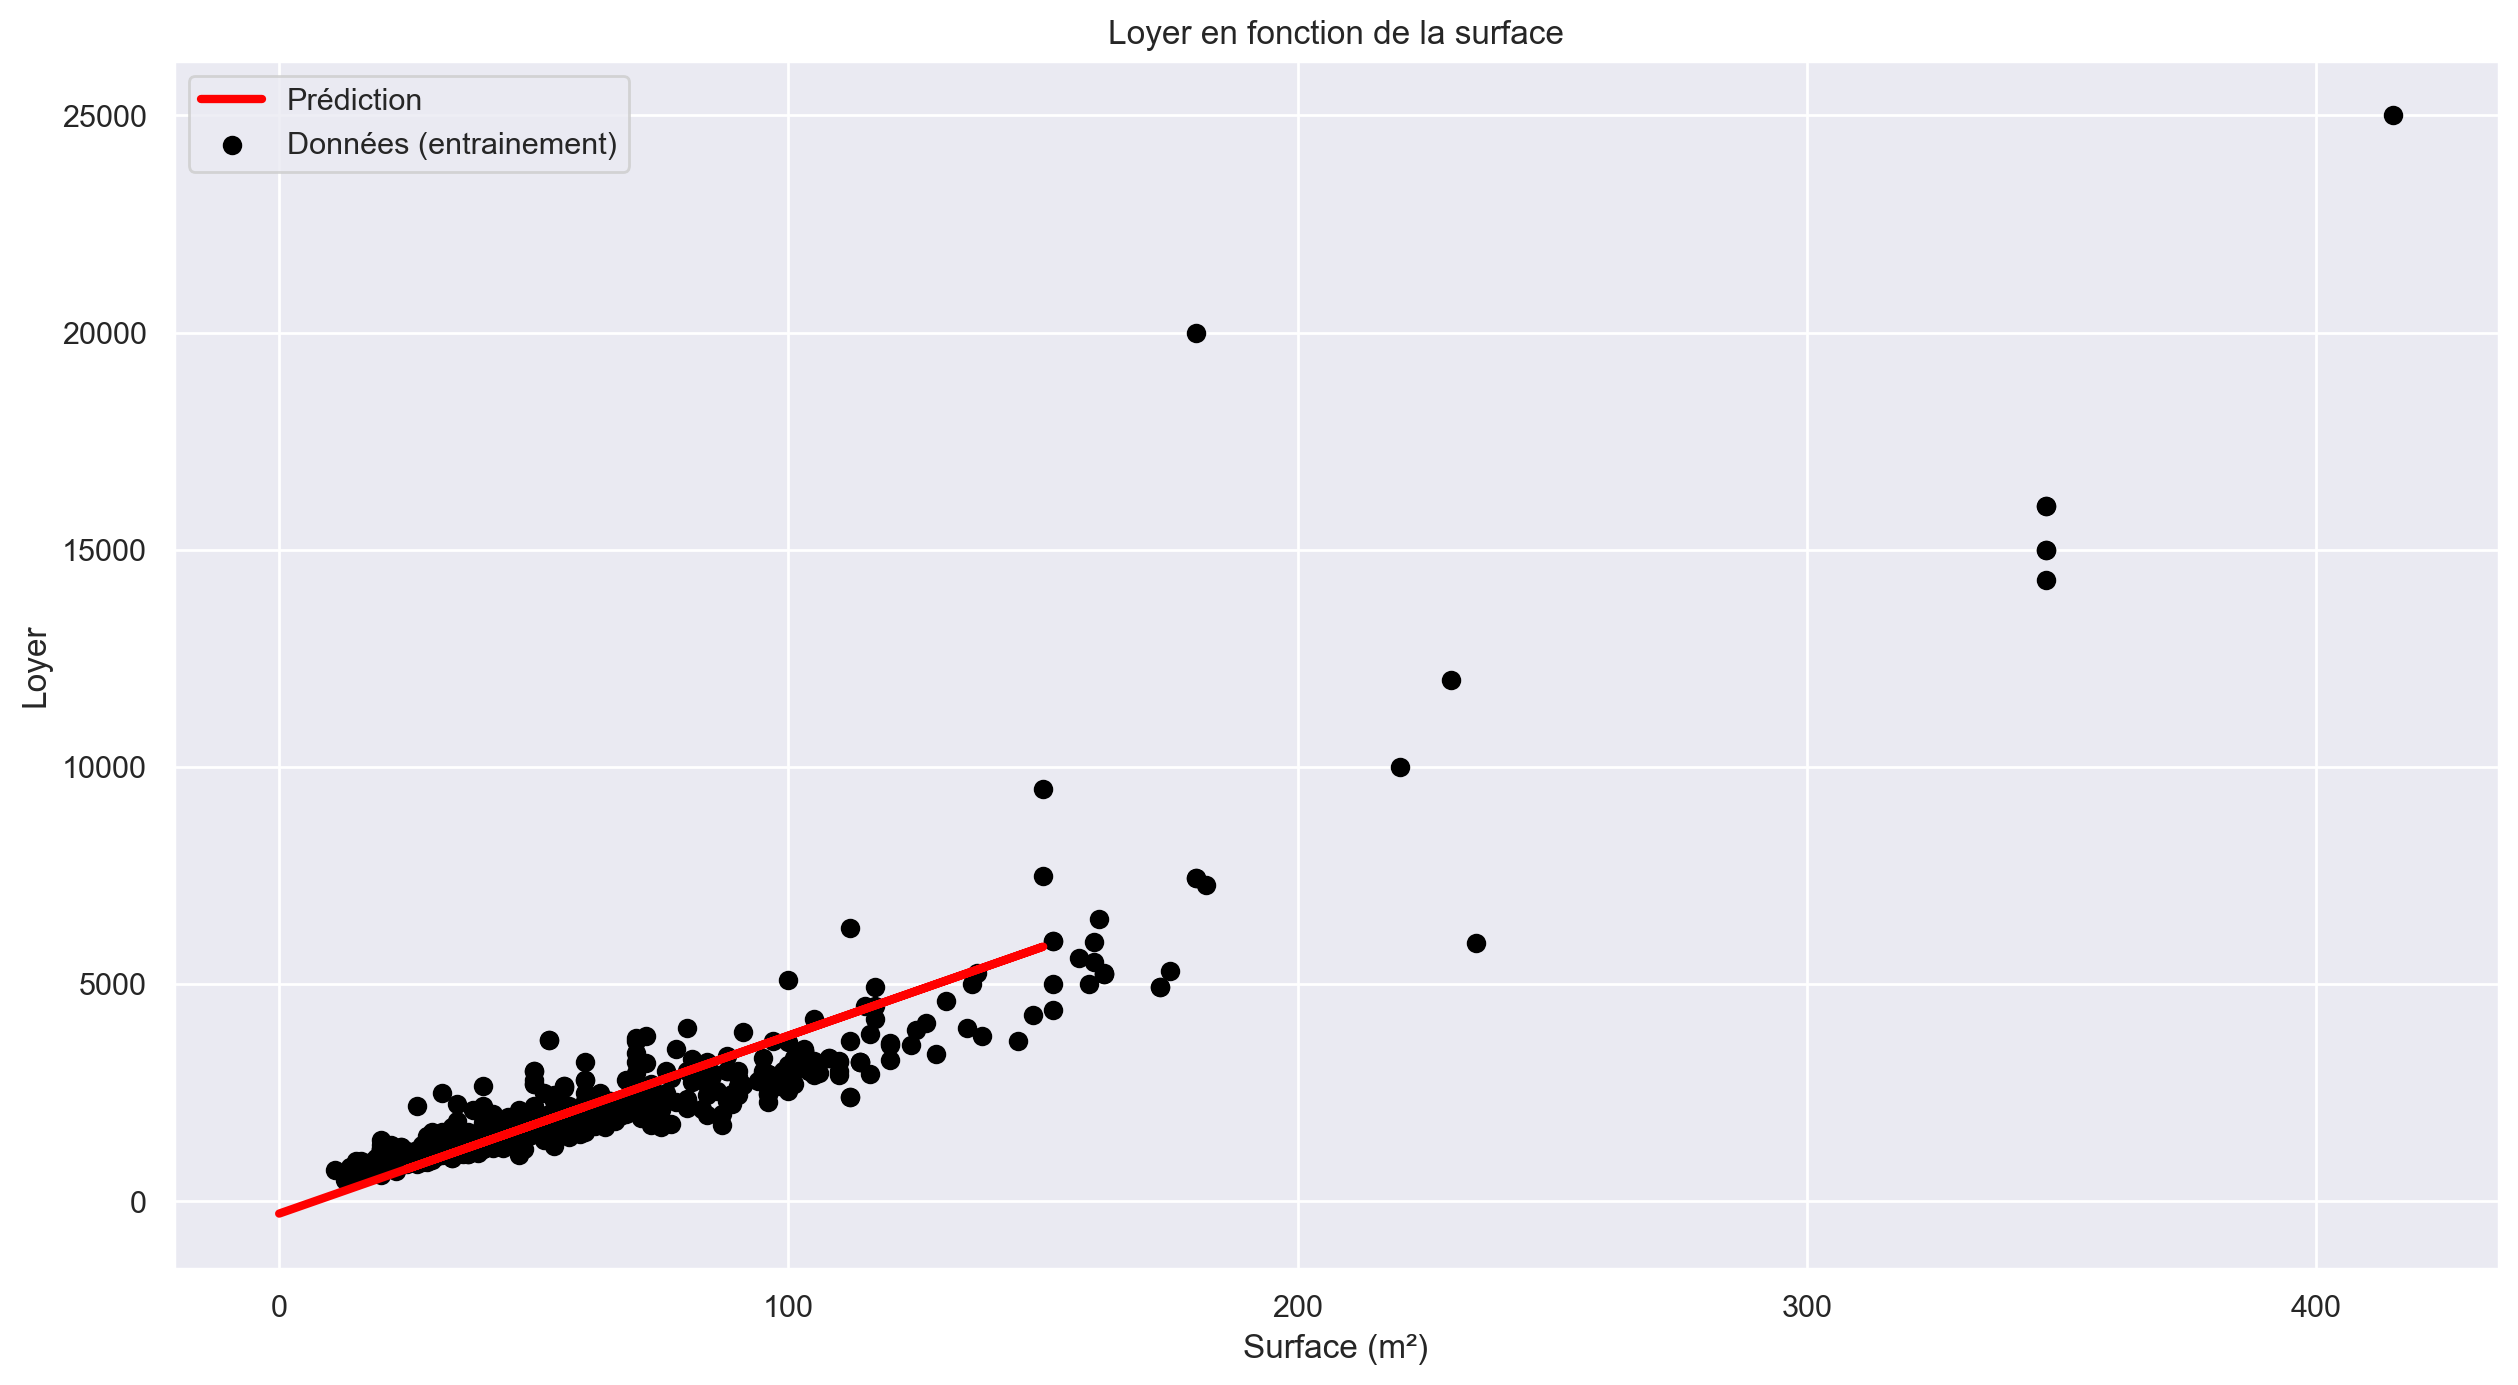

In [89]:
plt.figure(figsize=(15, 8), dpi=200) 
plt.title('Loyer en fonction de la surface')
plt.scatter(x = logements_df["surface"], y = logements_df["loyer"], color='black', label="Données (entrainement)")
plt.plot(donnees_surface_test, loyer_pred.reshape(-1, 1), color='red', linewidth=3, label="Prédiction")
plt.ylabel("Loyer")
plt.xlabel("Surface (m²)")
plt.legend()

Voilà nous avons notre graphique. On remarquera que notre graphique possède désormais une courbe, cette dernière est censée passer au milieu de tous les points et donc être la plus représentative de notre jeu de données. Pour obtenir l'équation de la courbe ($ y = ax + b $ où y est le loyer et x la surface), il faut utiliser les propriétés "coef_" et "intercept_" de la classe "LinearRegression" après avoir appelé la fonction "fit()".

In [50]:
display(f"Le coefficient directeur est {reg_lineaire.coef_[0]}") # a de ax + b
display(f"L'ordonnée à l'origine est {reg_lineaire.intercept_}") # b de ax +b 

'Le coefficient directeur est 40.97116431162338'

"L'ordonnée à l'origine est -283.378361166584"

Notre équation est donc 
$$ Loyer = 40.97116431162338 • Surface - 283.378361166584 $$

On remarquera que la propriété "coef_" retourne un tableau. Pourquoi ? Tout simplement parce que la classe LinearRegression peut également être utilisée pour une régression linéaire multiple (avec plusieurs variables d'entrées). Notre regression linéaire étant simple, il n'y a qu'un seul coefficient directeur.

Pour terminer, on va refaire cet exercice mais avec HuberRegressor pour voir les différences, car oui, le travail de data-scientifique c'est aussi la comparaison de modèles, ce n'est pas uniquement trouver les meilleurs valeurs pour nos hyperparamètres.

,Surface (test),Loyer (prediction huber),Loyer (prediction linéaire)
0,0,237.504370,-283.378361
3,25,993.883463,740.900747
6,37,1356.945428,1232.554718
2,45,1598.986738,1560.324033
1,60,2052.814194,2174.891498
5,90,2960.469106,3404.026427
4,150,4775.778930,5862.296286


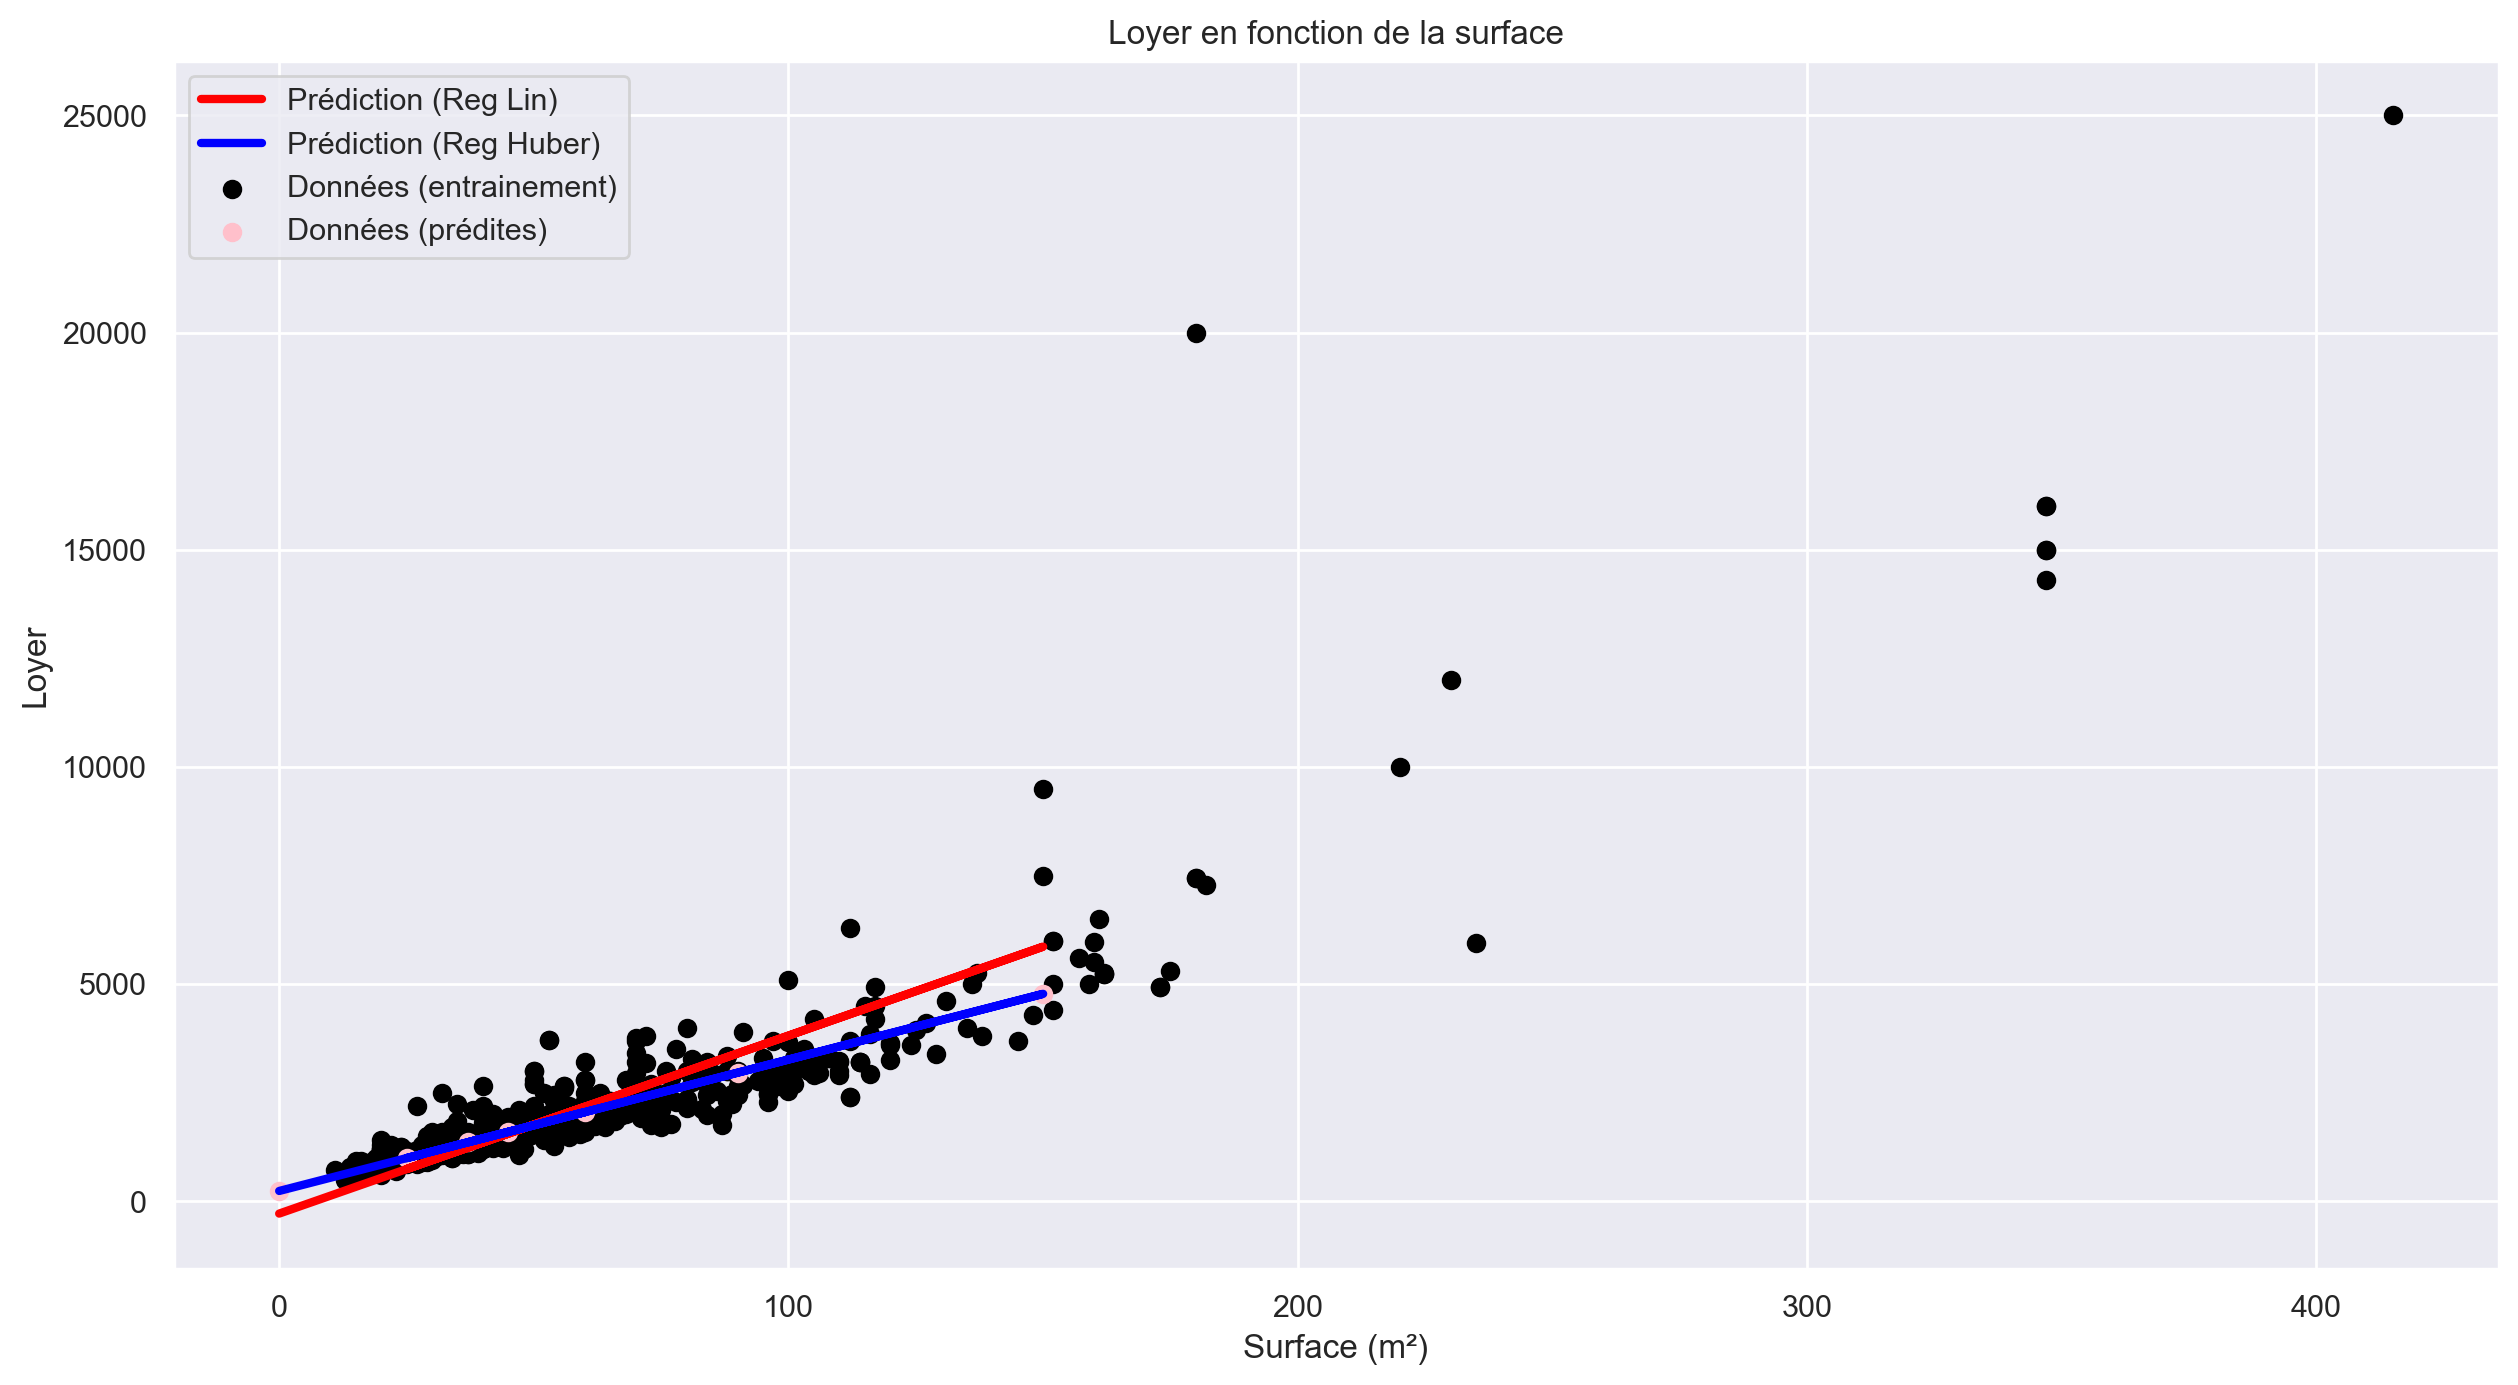

In [97]:
from sklearn.linear_model import HuberRegressor

liste_entrees = logements_df[["surface"]]
sortie = logements_df['loyer']

# On commence par instancier notre regression huber
reg_huber = HuberRegressor()

#Le reste ne change pas, on entraîne notre modèle
reg_huber.fit(liste_entrees, sortie)

# Et enfin, on fait notre test. 
# Etant donnée que nous n'avons pas de jeux de test, nous allons en créer un grâce à numpy
donnees_surface_test = np.array([0, 60, 45, 25, 150, 90, 37]).reshape(-1, 1)

loyer_pred_huber = reg_huber.predict(donnees_surface_test)

# On retourne un dataframe
df = pd.DataFrame({
    'Surface (test)': donnees_surface_test.flatten(), 
    'Loyer (prediction huber)': loyer_pred_huber, 
    'Loyer (prediction linéaire)': loyer_pred
})
df.sort_values(by=['Surface (test)'], inplace=True)
display(df)

# On affiche notre graphique
plt.figure(figsize=(15, 8), dpi=200) 
plt.title('Loyer en fonction de la surface')
plt.scatter(x = logements_df["surface"], y = logements_df["loyer"], color='black', label="Données (entrainement)")
plt.scatter(x = donnees_surface_test, y = loyer_pred_huber, color="pink", label="Données (prédites)")

plt.plot(donnees_surface_test, loyer_pred, color='red', linewidth=3, label="Prédiction (Reg Lin)")
plt.plot(donnees_surface_test, loyer_pred_huber, color='blue', linewidth=3, label="Prédiction (Reg Huber)")

plt.ylabel("Loyer")
plt.xlabel("Surface (m²)")
plt.legend()

Que constatons-nous ?

Nous aurions pu également utiliser la validation croisée pour mieux valider notre modèle via la fonction `train_test_split`, à vous de voir si vous souhaitez le faire.

Quoiqu'il en soit à partir de là, plusieurs solutions s'offrent à nous, nous pouvons retirer les valeurs aberrantes ou jouer sur le paramètre epsilon. Pour les données aberrantes, ça tombe bien, la classe HuberRegressor possède une propriété `outliers_` qui va créer un masque de données qu'il juge aberrantes via un masque.

Essayons !

In [100]:
from sklearn.linear_model import HuberRegressor

liste_entrees = logements_df[["surface"]]
sortie = logements_df['loyer']

# On commence par instancier notre regression huber
reg_huber = HuberRegressor()

#Le reste ne change pas, on entraîne notre modèle
reg_huber.fit(liste_entrees, sortie)

donnees_surface_test = np.array([0, 60, 45, 25, 150, 90, 37]).reshape(-1, 1)

loyer_pred_huber = reg_huber.predict(donnees_surface_test)

# Jusqu'ici tout est à l'identique par rapport à notre test précédent.
# Faisons donc entrer en jeu la propriété 'outliers_'

liste_valeurs_aberrantes = reg_huber.outliers_
display(liste_valeurs_aberrantes[:20:])

array([False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False])

```python
array([False, False, False, False, False, False, False, True, False, False, 
       True,  True, False, False, False, 
       False, False, False, False, False
     ])
```
Vous devez avoir le résultat ci-dessus en sortie (sortie limitée aux vingt premières entrées). Notre tableau est donc un masque booléen, ceci signifie donc que notre Regression Huberienne a signalé les valeurs aberrantes ou non via la valeur True (valeur aberrante) et la valeur False (valeur non-aberrante).

Première étape : Explorer notre tableau.

- Combien il y a de valeurs aberrantes ?
- Quel est le ratio de valeurs aberrantes ?

### A vous de coder 
N'oubliez pas d'utiliser la fonction `display()` pour afficher les résultats.